This notebook performs data analysis, data preprocessing on the rainfall data. In the data preprocessing part, we'll focus on handling missing values for both the numerical and categorical data separately.

## Data Analysis

In [117]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_csv("./dataset/rainfall.csv")

In [92]:
data.shape

(145460, 23)

In [93]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [94]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [95]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Pre-processing

### Handling missing values

In [97]:
#check for null-values
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

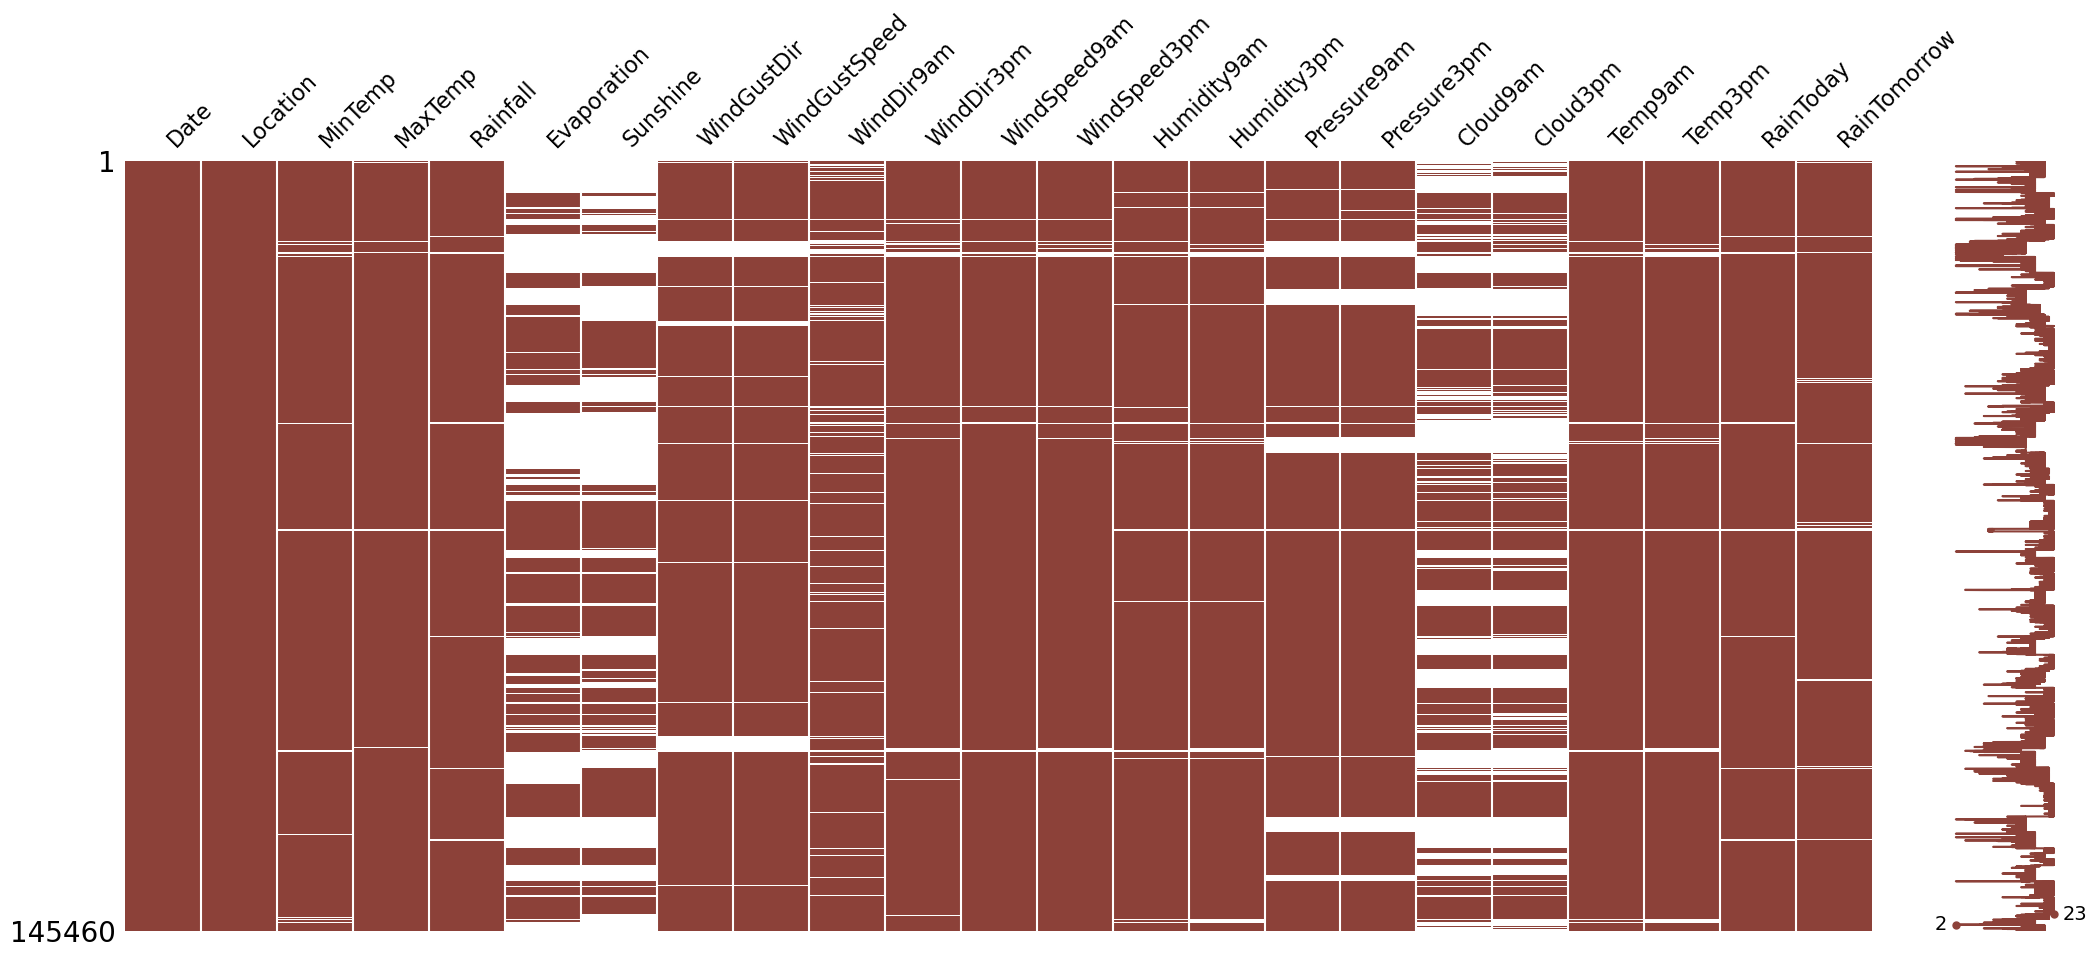

In [98]:
import missingno as msno
msno.matrix(data, color=(0.55,0.255,0.225), fontsize=16)

In [99]:
categorical_data = data[["RainToday", "RainTomorrow", "WindGustDir", "WindDir9am", "WindDir3pm"]]
#We also don't need Date. So we need to drop the date column along with the columns which has 20% of missing data
data.drop(columns=["Date", "Location","Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1, inplace=True)
data.drop(columns=["RainToday", "RainTomorrow", "WindGustDir", "WindDir9am", "WindDir3pm"], axis=1, inplace=True)

In [100]:
print(len(data.columns), data.columns, end="\n\n")
print(len(categorical_data.columns), categorical_data.columns)

12 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

5 Index(['RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


In [101]:
for col in data.columns:
    data[col].fillna(data[col].mean(), inplace=True)

In [102]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [103]:
# Replace missing values in categorical data with the most frequent data
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [104]:
categorical_columns = categorical_data.columns

In [105]:
#Transforming the categorical data
categorical_data = imp_mode.fit_transform(categorical_data) #ouputs an array
#converting the array to dataframe
categorical_data = pd.DataFrame(categorical_data, columns=categorical_columns)

In [106]:
categorical_data.head()

,RainToday,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm
0,No,No,W,W,WNW
1,No,No,WNW,NNW,WSW
2,No,No,WSW,W,WSW
3,No,No,NE,SE,E
4,No,No,W,ENE,NW


In [108]:
for col in categorical_data.columns:
    print(f"Unique values in '{col}' = {categorical_data[col].unique()}")

Unique values in 'RainToday' = ['No' 'Yes']
Unique values in 'RainTomorrow' = ['No' 'Yes']
Unique values in 'WindGustDir' = ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Unique values in 'WindDir9am' = ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
Unique values in 'WindDir3pm' = ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


In [109]:
# Now we need to encode the categorical data, such that we can input it to our model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [110]:
for col in categorical_data.columns:
    categorical_data[col] = le.fit_transform(categorical_data[col])

In [111]:
categorical_data.head()

,RainToday,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm
0,0,0,13,13,14
1,0,0,14,6,15
2,0,0,15,13,15
3,0,0,4,9,0
4,0,0,13,1,7


In [112]:
for col in categorical_data.columns:
    print(f"Unique values in '{col}' = {categorical_data[col].unique()}")

Unique values in 'RainToday' = [0 1]
Unique values in 'RainTomorrow' = [0 1]
Unique values in 'WindGustDir' = [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]
Unique values in 'WindDir9am' = [13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]
Unique values in 'WindDir3pm' = [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]


In [113]:
data = pd.concat([data, categorical_data], axis=1)

In [114]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
dtype: int64

In [115]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,16.990631,21.683390,0.219167,0.219146,8.09360,6.999526,7.798852
std,6.365750,7.088124,8.382488,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,6.449221,6.850057,0.413683,0.413669,4.69411,4.515839,4.538135
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,0.000000,0.000000,4.00000,3.000000,4.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,16.800000,21.400000,0.000000,0.000000,9.00000,7.000000,8.000000
75%,16.800000,28.200000,1.000000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,0.000000,0.000000,13.00000,11.000000,12.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000,15.00000,15.000000,15.000000


In [116]:
#save the preporcessed data in a new file
data.to_csv("./dataset/rainfall_processed.csv", index=False)

In [ ]:
#save the Label encoder
import pickle

pickle.dump(le, open("./saved models/label_encoder.pkl", "wb"))